<a href="https://colab.research.google.com/github/NFalah25/AI/blob/main/2141720129_24_Naufal%20Falah%20Wafiuddin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! chmod 600 kaggle.json

In [3]:
! KAGGLE_CONFIG_DIR=/content/ kaggle competitions download -c humpback-whale-identification

100% 5.49G/5.51G [00:46<00:00, 151MB/s]
100% 5.51G/5.51G [00:46<00:00, 127MB/s]


In [4]:
import zipfile
zip_file = zipfile.ZipFile('/content/humpback-whale-identification.zip')
zip_file.extractall('/tmp/')

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import cv2

import os
print(os.listdir("/tmp/"))

['pyright-104-gJ0zFYwSs1iT', 'train.csv', 'initgoogle_syslog_dir.0', 'train', 'kernel_manager_proxy.INFO', 'dap_multiplexer.INFO', 'dap_multiplexer.5cb24f36e9df.root.log.INFO.20221213-163922.62', 'kernel_manager_proxy.WARNING', 'pyright-104-cU8t7zD0QTBU', 'kernel_manager_proxy.5cb24f36e9df.root.log.WARNING.20221213-163923.35', 'debugger_2pjyc1xn0q', 'kernel_manager_proxy.5cb24f36e9df.root.log.INFO.20221213-163917.35', 'sample_submission.csv', 'python-languageserver-cancellation', 'test']


In [7]:
img_path='../tmp/train'
whale_image_list=os.listdir(img_path)
whale_image_list[10:21]

['38c68f5fb.jpg',
 'bc4760e99.jpg',
 '03dcf5c8e.jpg',
 '59acd323e.jpg',
 '025d86fa4.jpg',
 '284461502.jpg',
 '9242f9ffb.jpg',
 '346bca9d4.jpg',
 '3641717ad.jpg',
 'a6ae5e132.jpg',
 'af40a97d0.jpg']

Lihat semua konversi ruang warna yang disediakan OpenCV

In [8]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [9]:
len(flags)

346

In [10]:
flags[30:40]

['COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG']

**Load Gambar**

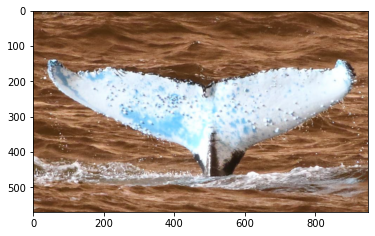

In [11]:
whale = cv2.imread(img_path+'/'+whale_image_list[30])
plt.imshow(whale)
plt.show()

**Mengubah Ruang Warna**

Faktanya, OpenCV secara default membaca gambar dalam format BGR. Anda dapat menggunakan fungsi cv2.cvtColor(input_image, flag) (di mana flag menentukan jenis konversi) untuk mengubah ruang warna.

Mengkonversi dari BGR ke ruang warna RGB

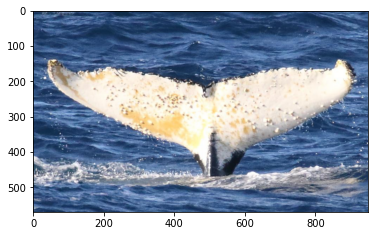

In [12]:
whale_rgb = cv2.cvtColor(whale, cv2.COLOR_BGR2RGB)
plt.imshow(whale_rgb)
plt.show()

**Mengkonversi dari ruang warna BGR ke GREY**

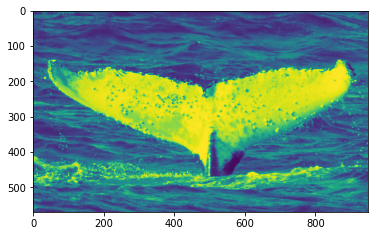

In [13]:
whale_gray = cv2.cvtColor(whale, cv2.COLOR_BGR2GRAY)
plt.imshow(whale_gray)
plt.show()

**Mengkonversi dari ruang warna BGR ke HSV**

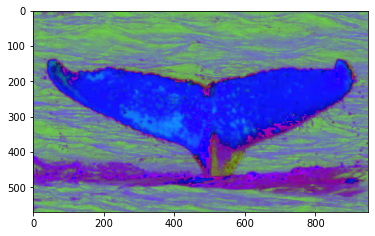

In [14]:
whale_hsv = cv2.cvtColor(whale, cv2.COLOR_BGR2HSV)
plt.imshow(whale_hsv)
plt.show()

Pisahkan warna rgb RGB
warna R(Red)

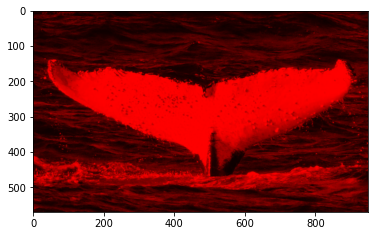

In [15]:
red = whale_rgb.copy()
# set blue and green channels to 0
red[:, :, 1] = 0
red[:, :, 2] = 0
# RGB - Red
plt.imshow(red)
plt.show()

warna G(Green)

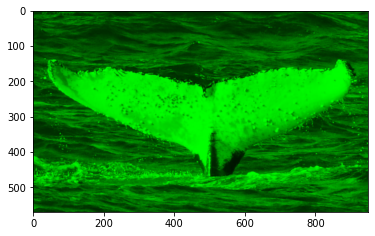

In [16]:
green = whale_rgb.copy()
# set blue and red channels to 0
green[:, :, 0] = 0
green[:, :, 2] = 0
# RGB - Green
plt.imshow(green)
plt.show()

warna B(Blue)

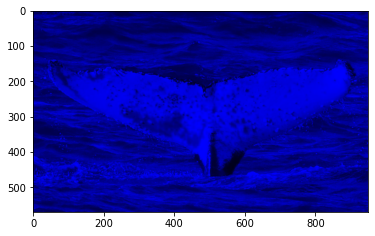

In [17]:
blue = whale_rgb.copy()
# set green and red channels to 0
blue[:, :, 0] = 0
blue[:, :, 1] = 0
# RGB - Blue
plt.imshow(blue)
plt.show()

**Memvisualisasikan Ikan Paus dalam Ruang Warna RGB**

HSV adalah pilihan ruang warna yang bagus untuk melakukan segmentasi berdasarkan warna, tetapi untuk mengetahui alasannya, mari kita bandingkan gambar dalam ruang warna RGB dan HSV dengan memvisualisasikan distribusi warna pikselnya. Plot 3D menunjukkan ini dengan cukup baik, dengan setiap sumbu mewakili salah satu saluran dalam ruang warna.

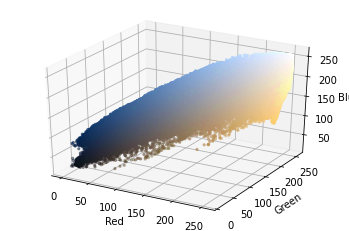

In [18]:
r, g, b = cv2.split(whale_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = whale_rgb.reshape((np.shape(whale_rgb)[0]*np.shape(whale_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

**Memvisualisasikan Ikan Paus di Ruang Warna HSV**
HSV adalah singkatan dari Hue, Saturation, dan Value (atau kecerahan), dan merupakan ruang warna silinder. Warna, atau rona, dimodelkan sebagai dimensi sudut yang berputar di sekitar sumbu vertikal tengah, yang mewakili saluran nilai. Nilai berubah dari gelap (0 di bagian bawah) ke terang di bagian atas. Sumbu ketiga, saturasi, menentukan corak rona dari yang paling tidak tersaturasi, pada sumbu vertikal, hingga yang paling tersaturasi terjauh dari pusat:

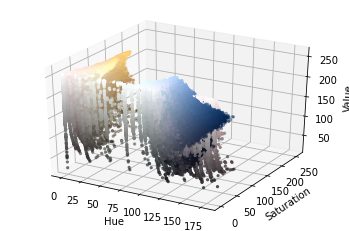

In [19]:
h, s, v = cv2.split(whale_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Di ruang HSV, jeruk biru jauh lebih terlokalisasi dan dapat dipisahkan secara visual. Saturasi dan nilai warna biru bervariasi, tetapi sebagian besar berada dalam rentang kecil di sepanjang sumbu rona. Ini adalah poin kunci yang dapat dimanfaatkan untuk segmentasi.

**Memilih Rentang**

Mari ambang paus hanya berdasarkan rentang warna biru yang sederhana.

In [20]:
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

Cara sederhana untuk menampilkan warna dengan Python adalah membuat gambar persegi kecil dengan warna yang diinginkan dan memplotnya di Matplotlib.

In [21]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

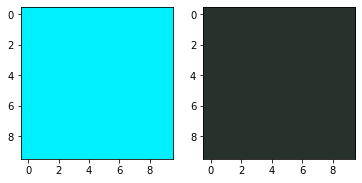

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

Setelah Anda mendapatkan rentang warna yang layak, Anda dapat menggunakan cv2.inRange() untuk mencoba mendekati Whale. inRange() membutuhkan tiga parameter: gambar, rentang yang lebih rendah, dan rentang yang lebih tinggi. Ini mengembalikan topeng biner (ndarray 1s dan 0s) ukuran gambar di mana nilai 1 menunjukkan nilai dalam rentang, dan nilai nol menunjukkan nilai di luar:

In [23]:
mask = cv2.inRange(whale_hsv, lower_blue, upper_blue)

In [24]:
result = cv2.bitwise_and(whale_rgb, whale_rgb, mask=mask)

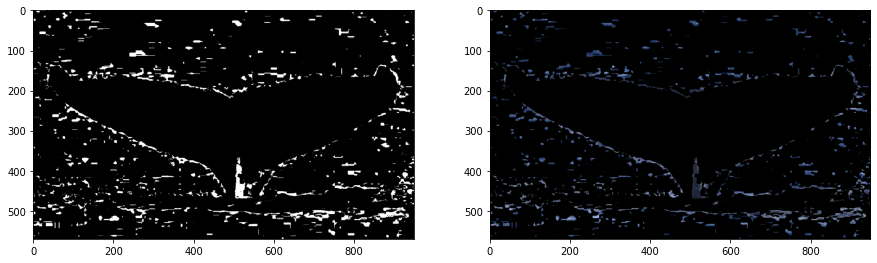

In [25]:
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

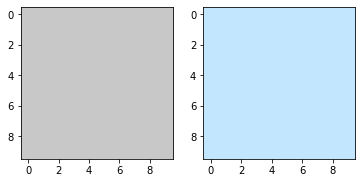

In [26]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

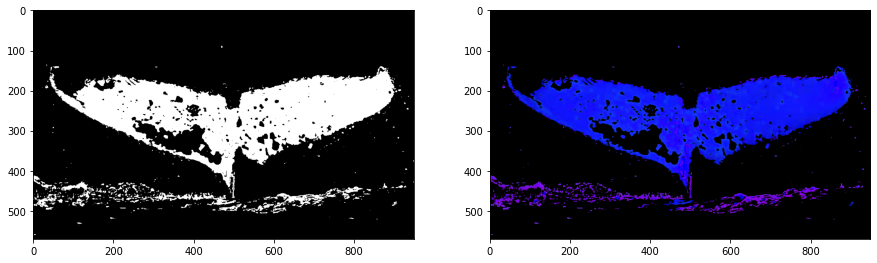

In [27]:
mask_white = cv2.inRange(whale_hsv, light_white, dark_white)
result_white = cv2.bitwise_and(whale_hsv, whale_hsv, mask=mask_white)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

Tidak buruk! Sekarang Anda dapat menggabungkan topeng. Menambahkan dua topeng bersama-sama menghasilkan 1 nilai di mana pun ada biru atau putih

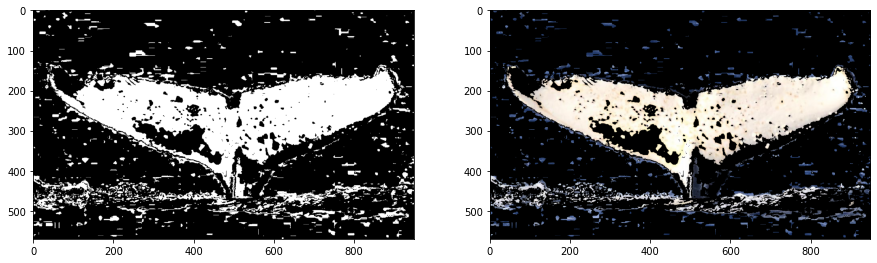

In [28]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(whale_rgb, whale_rgb, mask=final_mask)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

Gaussian blur adalah filter gambar yang menggunakan sejenis fungsi yang disebut Gaussian untuk mengubah setiap piksel pada gambar. Ini memiliki hasil menghaluskan noise gambar dan mengurangi detail.

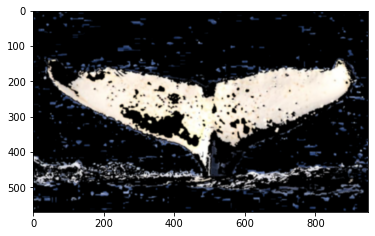

In [29]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

**Segmentasi Menggeneralisasi ke Kerabat Paus**

In [30]:
whales_friends = []
for whale in whale_image_list[:10]:
   friend = cv2.cvtColor(cv2.imread(img_path +'/'+ whale), cv2.COLOR_BGR2RGB)
   whales_friends.append(friend)

In [31]:
def segment_whale(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Apply the blue mask 
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

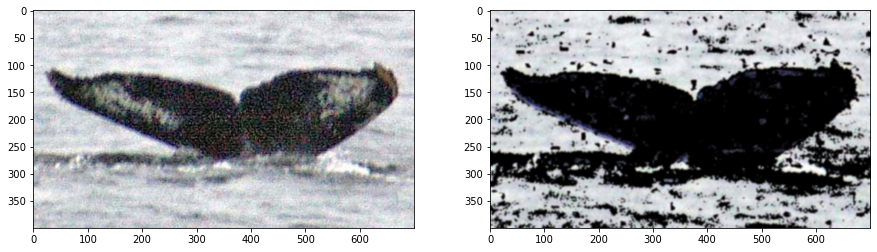

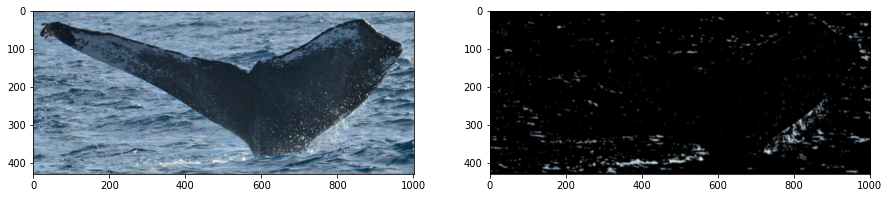

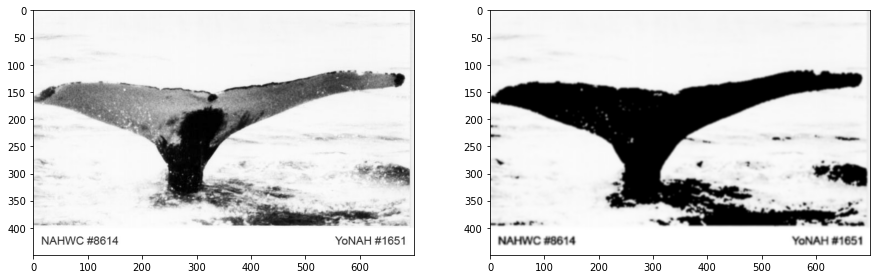

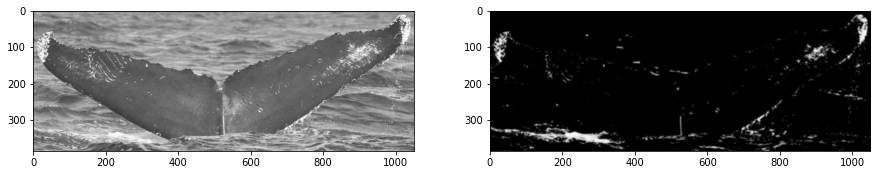

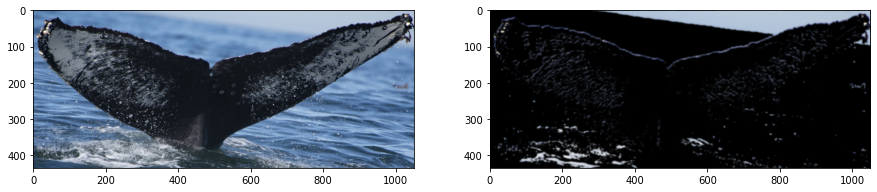

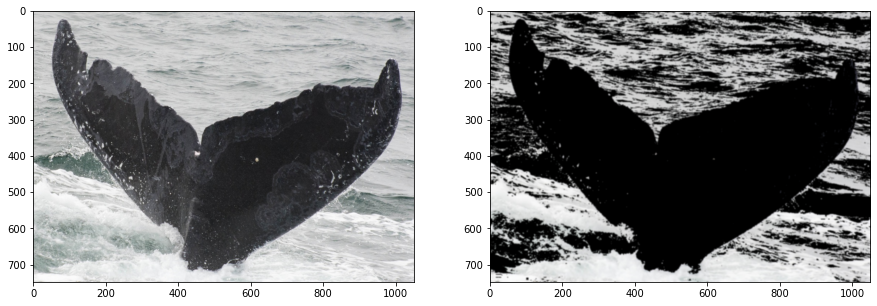

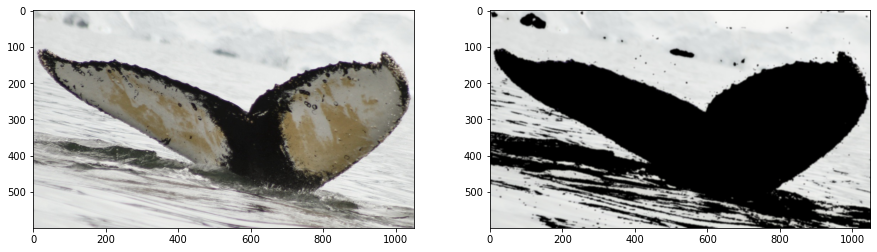

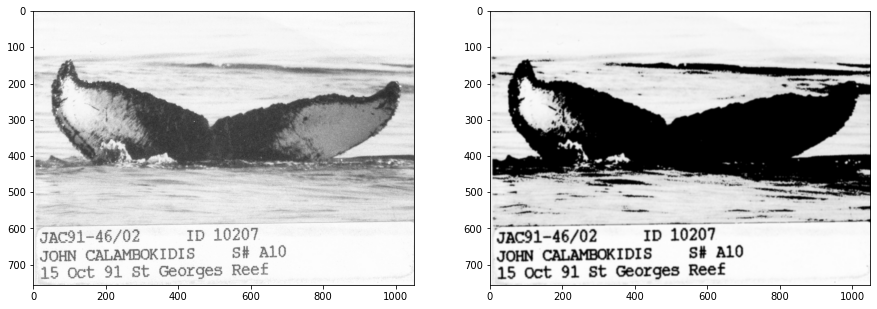

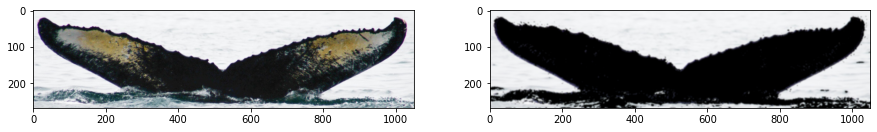

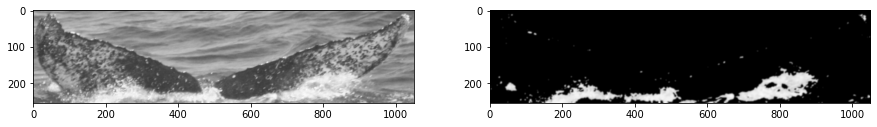

In [32]:
results = [segment_whale(whale) for whale in whales_friends]

for i in range(10):
    plt.figure(figsize=(15,20))
    plt.subplot(1, 2, 1)
    plt.imshow(whales_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()